In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
transaction1 = pd.read_excel(r'/Users/zayed/Documents/Data analysis projects/Forage/Quantum/QVI Transaction Data.xlsx')
transaction = transaction1.copy()
transaction.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.10
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20


In [90]:
# Check to see if there are nulls
transaction.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There are no nulls, therefore, we can get to converting columns to a more usable type

In [91]:
# Converting excel date to pandas date format
transaction['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction['DATE'], unit='D')
transaction['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [92]:
# renaming columns to lower case so that they are easier to call
transaction.columns = transaction.columns.str.lower()
transaction.columns

Index(['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr',
       'prod_name', 'prod_qty', 'tot_sales'],
      dtype='object')

In [93]:
# checking data types of our columns to ensure they are useable
transaction.dtypes

date              datetime64[ns]
store_nbr                  int64
lylty_card_nbr             int64
txn_id                     int64
prod_nbr                   int64
prod_name                 object
prod_qty                   int64
tot_sales                float64
dtype: object

In [94]:
# investigating data to see if there are any anomalies
pd.set_option('display.float_format', '{:.2f}'.format) #disable scientific notation in pandas
transaction.describe(include='all')

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
count,264836,264836.00,264836.00,264836.00,264836.00,264836,264836.00,264836.00
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,2018-12-30 00:52:12.879215616,135.08,135549.48,135158.31,56.58,NaN,1.91,7.30
min,2018-07-01 00:00:00,1.00,1000.00,1.00,1.00,NaN,1.00,1.50
25%,2018-09-30 00:00:00,70.00,70021.00,67601.50,28.00,NaN,2.00,5.40
50%,2018-12-30 00:00:00,130.00,130357.50,135137.50,56.00,NaN,2.00,7.40
75%,2019-03-31 00:00:00,203.00,203094.25,202701.25,85.00,NaN,2.00,9.20
max,2019-06-30 00:00:00,272.00,2373711.00,2415841.00,114.00,NaN,200.00,650.00


The data seem to be largely without anomalies. 
The only potential anomaly might be the prod_qty max. Here, though the 75th percentile remains just 2 units, the max is 200 units. This deserves further investigation later. 

<Axes: ylabel='prod_qty'>

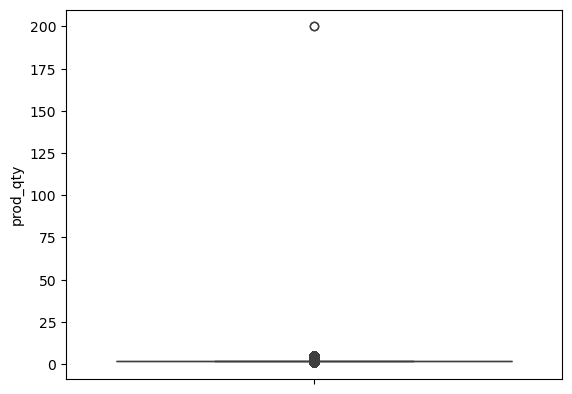

In [95]:
# visualizing this variable's distribution
sns.boxplot(transaction.prod_qty)

The boxplot certainly makes it seem like this is an outlier. Let us investigate these observations. 

In [96]:
#Viewing outlier observations (above the 99th percentile)
transaction[transaction.prod_qty > transaction.prod_qty.quantile(0.99)]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.00
16,2018-08-18,20,20418,17413,94,Burger Rings 220g,4,9.20
...,...,...,...,...,...,...,...,...
258745,2019-05-19,220,220338,219884,98,NCC Sour Cream & Garden Chives 175g,3,9.00
258759,2019-05-14,238,238169,242560,44,Thins Chips Light& Tangy 175g,4,13.20
258770,2019-05-18,248,248246,250503,80,Natural ChipCo Sea Salt & Vinegr 175g,3,9.00
258782,2018-08-15,259,259174,258569,92,WW Crinkle Cut Chicken 175g,3,5.10


It appears that we have 1279 rows above the 99th percentile with normal prod_qty values. Let us make our query more explicit

In [97]:
transaction[transaction.prod_qty > 10]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00


2 customers have purchased 200 units of 380 gram chips. Is this an anomaly? Let us view other transactions they may have made to ascertian this.

In [98]:
# Viewing the customers' other transactions with their txn_id
transaction[transaction.txn_id.isin([226201, 226210])]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.00
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.00


Since these are the only 2 transactions that are unusual (and don't represent the usual customer in regards to our analysis) we shall exclude them

In [99]:
#excluding these items from our data set
transaction = transaction[~transaction.txn_id.isin([226201, 226210])]
transaction

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.80
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.40
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.80
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.80


In [100]:
#splitting up Date columns as this may be useful in future analysis
#transaction['dayofmonth'] = 
transaction['dayofmonth'] = transaction.date.dt.day
transaction['dayofweek'] = transaction.date.dt.day_name()
transaction['year'] = transaction.date.dt.year
transaction['month'] = transaction.date.dt.month
transaction.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,dayofmonth,dayofweek,year,month
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,17,Wednesday,2018,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,14,Tuesday,2019,5
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,20,Monday,2019,5
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,17,Friday,2018,8
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,18,Saturday,2018,8


In [101]:
#extract packet size from product name
transaction['pkt_size'] = transaction.prod_name.str.split(' ').str.get(-1).str.replace(r'\D', '', regex=True)
transaction.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,dayofmonth,dayofweek,year,month,pkt_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,17,Wednesday,2018,10,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,14,Tuesday,2019,5,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,20,Monday,2019,5,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,17,Friday,2018,8,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,18,Saturday,2018,8,150


In [175]:
# Extract company name from product name
transaction['company'] = transaction.prod_name.str.split(' ').str[0]
transaction.company.value_counts().reset_index()

,company,count
0,Kettle,41288
1,Smiths,27390
2,Pringles,25102
3,Doritos,22041
4,Thins,14075
5,RRD,11894
6,Infuzions,11057
7,WW,10320
8,Cobs,9693
9,Tostitos,9471


A couple of the company names have been mispelled, let us rectify this. 

In [ ]:
transaction.loc[transaction.company == 'Dorito', 'company'] = 'Doritos'
transaction.loc[transaction.company == 'Infzns', 'company'] = 'Infuzions'
transaction.loc[transaction.company == 'Snbts', 'company'] = 'Sunbites'
transaction.loc[transaction.company == 'Smitsh', 'company'] = 'Smitsh'
transaction.company.value_counts().reset_index()

,company,count
0,Kettle,41288
1,Smiths,27390
2,Doritos,25224
3,Pringles,25102
4,Infuzions,14201
5,Thins,14075
6,RRD,11894
7,WW,10320
8,Cobs,9693
9,Tostitos,9471


In [103]:
# transaction.prod_name.str.split(' ').str[-2].value_counts().reset_index().head(40)

In [126]:
# There are salsa items so let us remove them
transaction = transaction[~transaction['prod_name'].str.contains(r'Salsa')]

In [164]:
# changing dtype of packet size column
transaction['pkt_size'] = pd.to_numeric(transaction.pkt_size, errors='coerce').astype('Int32')

In [166]:
transaction.pkt_size.describe()

count   243483.00
mean       176.13
std         59.64
min         70.00
25%        150.00
50%        170.00
75%        175.00
max        380.00
Name: pkt_size, dtype: Float64

The values seem reasonable, and there are no outliers. The largest size is 380g and the smallest size is 70g

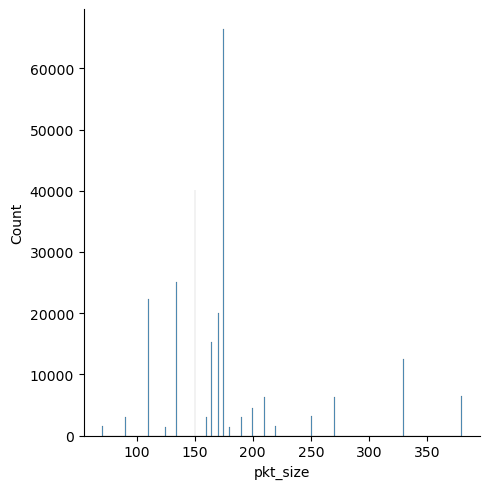

In [171]:
# let us look at the distribution of values. 
sns.displot(transaction.pkt_size)

It looks like 175g is the most popular pack size, having over 60,000 counts. 

In [174]:
transaction

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,dayofmonth,dayofweek,year,month,pkt_size,company
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,17,Wednesday,2018,10,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,14,Tuesday,2019,5,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,20,Monday,2019,5,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,17,Friday,2018,8,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,18,Saturday,2018,8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.80,9,Saturday,2019,3,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.40,13,Monday,2018,8,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.80,6,Tuesday,2018,11,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.80,27,Thursday,2018,12,150,Doritos
